In [5]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec , Phrases

import numpy as np
from multiprocessing import cpu_count

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
nltk.download('punkt')

import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
def getFV(document, model1, sizeModel): #promedio del vector caracteristico
    
    words=document.split()
    s=np.zeros(sizeModel)
    k=1
    for w in words:
        if w in model1.wv.vocab:
            s=s+model1[w]
            k=k+1
    
    return s/k

In [6]:
model = gensim.models.Word2Vec.load('w2v300_5.model')

In [7]:
model.wv.vocab

{'presentadora': <gensim.models.keyedvectors.Vocab at 0x1e724e88780>,
 'exjurado': <gensim.models.keyedvectors.Vocab at 0x1e724e887f0>,
 'artista': <gensim.models.keyedvectors.Vocab at 0x1e724e88908>,
 'año': <gensim.models.keyedvectors.Vocab at 0x1e724e88978>,
 'fiorella': <gensim.models.keyedvectors.Vocab at 0x1e724e88828>,
 'rodríguez': <gensim.models.keyedvectors.Vocab at 0x1e726e28f98>,
 '45': <gensim.models.keyedvectors.Vocab at 0x1e726e28b00>,
 'presentó': <gensim.models.keyedvectors.Vocab at 0x1e726f7f1d0>,
 'nuevo': <gensim.models.keyedvectors.Vocab at 0x1e726f7f2e8>,
 'dueño': <gensim.models.keyedvectors.Vocab at 0x1e726f7f320>,
 'corazón': <gensim.models.keyedvectors.Vocab at 0x1e726f7f358>,
 'través': <gensim.models.keyedvectors.Vocab at 0x1e726f7f390>,
 'fotografías': <gensim.models.keyedvectors.Vocab at 0x1e726f7f3c8>,
 'instagram': <gensim.models.keyedvectors.Vocab at 0x1e726f7f400>,
 'fanáticos': <gensim.models.keyedvectors.Vocab at 0x1e726f7f438>,
 'tardaron': <gensim.

In [8]:
df_noticias_train = pd.read_csv('eltrome3m_clean.csv')
df_noticias_train.head()

,Unnamed: 0,Titulo,Autor,Resumen,Contenido,Categoria,Fecha
0,0,chris evans hace viral promocionar leche méxic...,redacción trome,capitán américa causa revuelo llegada país nor...,chris evans solo sorprendido seguidores solo r...,celebrities,2019-09-27 23:10:00
1,1,carlos burgos exalcalde san juan lurigancho ca...,redacción trome,carlos burgos prófugo exburgomaestre san juan ...,carlos burgos exalcalde san juan lurigancho ca...,actualidad,2019-09-27 23:04:00
2,2,delincuente extranjero asegura tener derecho r...,redacción trome,malhechor intentó justificarse asegurando madr...,indignante delincuente nacionalidad venezolana...,policiales,2019-09-27 22:49:00
3,3,pareja grabada relaciones calle autoridad defi...,redacción trome,pareja grabada céntrica ciudad españa,barrio castellón españa único habla pareja gra...,españa,2019-09-27 22:00:00
4,4,duelo campeones ángeles errol spence shawn por...,redacción trome,invicto errol spence buscará unificar sutítulo...,errol spence vs shawn porter vivo dos mejores ...,deportes,2019-09-27 21:39:00


In [9]:
df_2 = df_noticias_train.dropna()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df_2['Vector'] = df_2['Contenido'].apply(lambda x: getFV(x,model,300)) 

E:\INSTALACIONES\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [16]:
def grafico_silueta(modelo, data_X, n_clusters):
  # ----------------- Definicion de figura -----------------------------------
  # Crea los subplots para mostrar la figura
  # Especifica tamaños para la figura
  fig, (ax1) = plt.subplots(1, 1) 
  fig.set_size_inches(9, 7) 
  
  # ----------------- Definicion de limites -----------------------------------
  # Limites en X del grafico de siluetas
  # Los limites de Y se incrementan (n_clusters+1)*10, para dejar 
  # espacio entre siluetas
  ax1.set_xlim([-0.1, 1]) 
  ax1.set_ylim([0, len(data_X) + (n_clusters + 1) * 10])

  # ----------------- Predicción de Clases ------------------------------------
  # Se predicen los valores, el puntaje de silueta promedio y elpuntaje silueta
  # de cada muestra 
  cluster_labels = modelo.predict(data_X)
  silhouette_avg = silhouette_score(data_X, cluster_labels)
  sample_silhouette_values = silhouette_samples(data_X, cluster_labels)

  # ----------------- Ploteo de Gráfico ---------------------------------------
  y_lower = 10
  for i in range(n_clusters):
    # Se agregan los valores de la silueta 'i' y se ordenan
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    #Se hallan el numero de muestras y se suma al lower
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [18]:
from sklearn.model_selection import train_test_split

X = list(df_2['Vector'])
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)
print(len(X), len(X_train), len(X_test))

5473 4378 1095


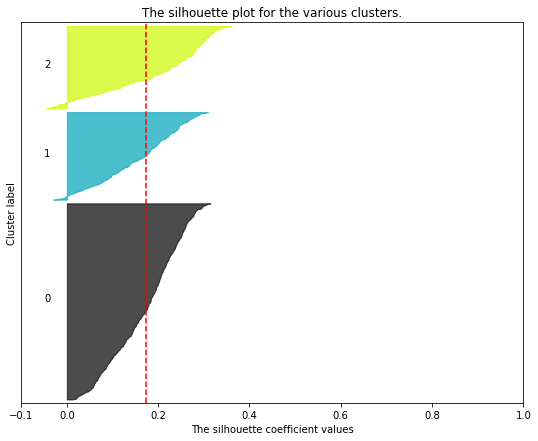

In [23]:
nc = 3
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)

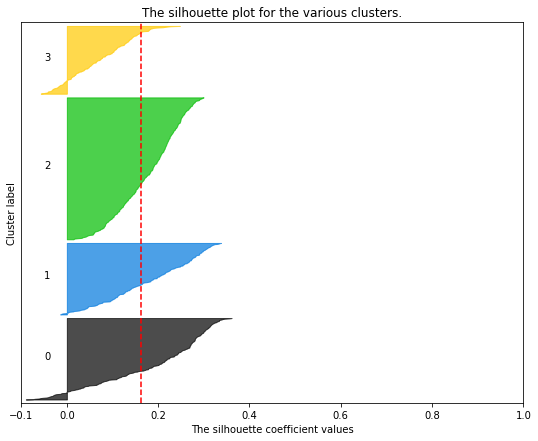

In [24]:
nc = 4
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)

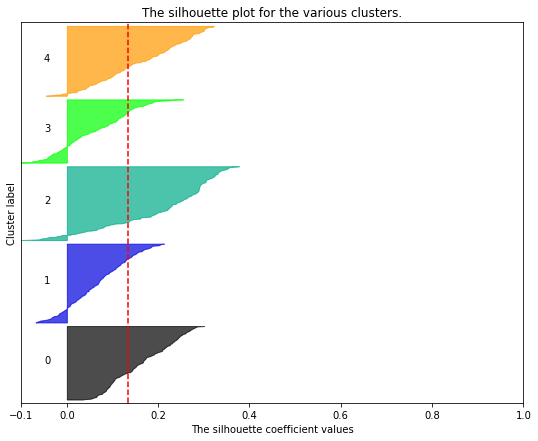

In [25]:
nc = 5
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)